# Week 5 - IDENTIFY WHEN AN ARTICLE MIGHT BE FAKE

April Meyer

DSC 630 Predictive Analytics


In [1]:
#all libraries that are need for exercises

import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# import into dataframe
news = pd.read_csv("train.csv")

# the structure of the data frame
news.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [3]:
# Summary statistics for all variables
print("Describe Data")
print(news.describe())
print("\nSummarized Data")
print(news.describe(include=['O']))

Describe Data
                 id         label
count  20800.000000  20800.000000
mean   10399.500000      0.500625
std     6004.587135      0.500012
min        0.000000      0.000000
25%     5199.750000      0.000000
50%    10399.500000      1.000000
75%    15599.250000      1.000000
max    20799.000000      1.000000

Summarized Data
                                                    title   author   text
count                                               20242    18843  20761
unique                                              19803     4201  20386
top     The Dark Agenda Behind Globalism And Open Borders  Pam Key       
freq                                                    5      243     75


In [4]:
# labels
labels = news.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [5]:
# Split the dataset
x_train,x_test,y_train,y_test = train_test_split(news['text'].values.astype('U'), labels, test_size=0.2, random_state=7)

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

# PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test
y_pred = pac.predict(tfidf_test)

# calculate accuracy
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.44%


In [6]:
# confusion matrix
confusion_matrix(y_test,y_pred, labels=[1,0])

array([[2033,   67],
       [  81, 1979]], dtype=int64)

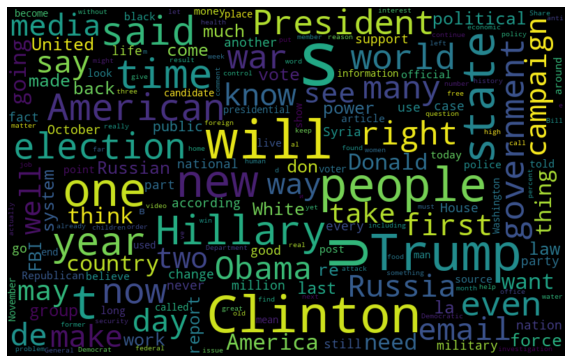

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_data = news[news["label"] == 1]
all_words = ' '.join([str(text) for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

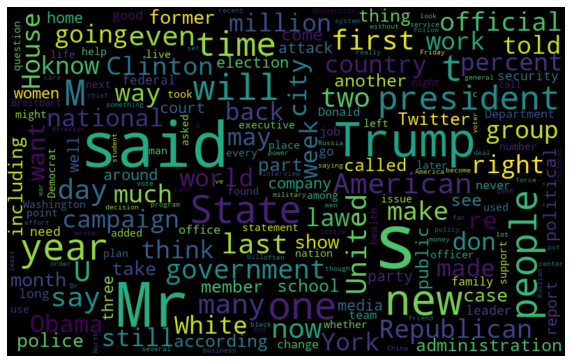

In [15]:
from wordcloud import WordCloud
real_data = news[news["label"] == 0]
all_words = ' '.join([str(text) for text in real_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()